In [20]:
import pandas as pd
df = pd.read_pickle('DATA/Dataset/wikiart_full_combined_try.pkl')


In [16]:
from matplotlib import pyplot as plt
from PIL import Image
general_image_path = '/home/tliberatore2/Reproduction-of-ArtSAGENet/wikiart/'
def plot_examples(query, positive_indexes, df):
    plt.imshow(Image.open(general_image_path+df.loc[query].relative_path))
    plt.title(str(df.loc[query].artist_name+ 'influencers:'+str(df.loc[query].influenced_by)))
    fig, axes = plt.subplots(1, 10, figsize=(20, 10))
    for i, ax in enumerate(axes):
        #ax.imshow(Image.open('wikiart/'+df.iloc[query].relative_path))
        image_path = general_image_path+df.iloc[positive_indexes[i]].relative_path
        image =  Image.open(image_path)
        ax.imshow(image)
        ax.axis('off')
        ax.set_title(df.iloc[positive_indexes[i]].artist_name)
    plt.show()

In [2]:
from matplotlib import pyplot as plt
from PIL import Image
general_image_path = '/home/tliberatore2/Reproduction-of-ArtSAGENet/wikiart/'
def plot_examples(query,positive_indexes, negative_indexes, df):
    plt.imshow(Image.open(general_image_path+df.loc[query].relative_path))
    plt.title(str(df.loc[query].artist_name+ ' influencers:'+str(df.loc[query].influenced_by)))
    fig, axes = plt.subplots(2, 10, figsize=(20, 10))
    for i, (ax_pos, ax_neg) in enumerate(zip(axes[0], axes[1])):
        if i < len(positive_indexes):
            image_path_pos = general_image_path + df.iloc[positive_indexes[i]].relative_path
            image_pos = Image.open(image_path_pos)
            ax_pos.imshow(image_pos)
            ax_pos.axis('off')
            ax_pos.set_title(df.iloc[positive_indexes[i]].artist_name)
        
        if i < len(negative_indexes):
            image_path_neg = general_image_path + df.iloc[negative_indexes[i]].relative_path
            image_neg = Image.open(image_path_neg)
            ax_neg.imshow(image_neg)
            ax_neg.axis('off')
            ax_neg.set_title(df.iloc[negative_indexes[i]].artist_name)
    plt.show()

DATA/Dataset_toload/train_dataset_image_features_posrandom_negfaiss.pt


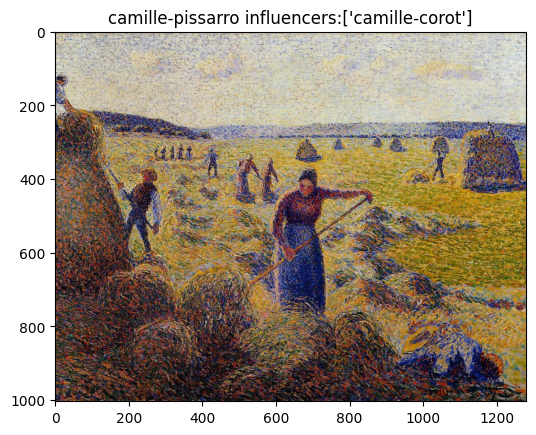

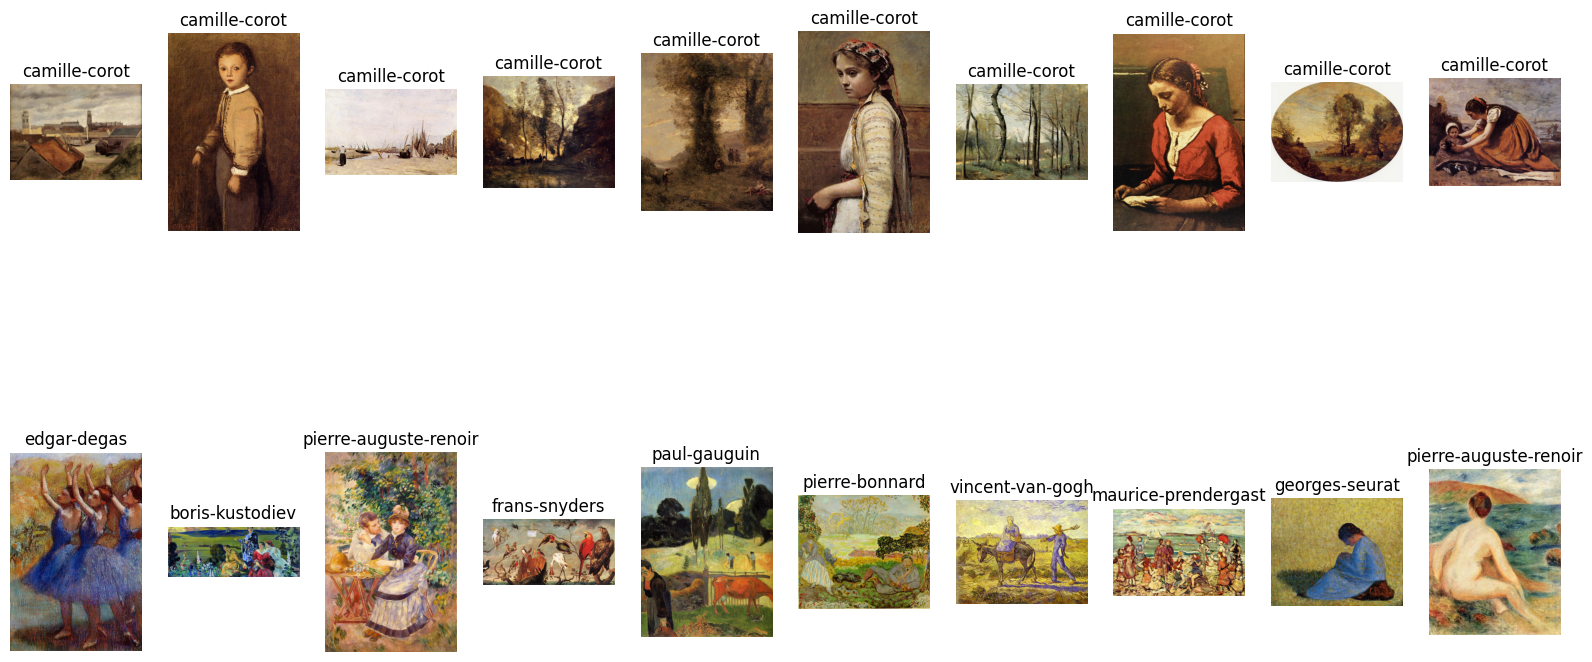

In [26]:
import torch
from create_data_loader import TripletLossDataset_features
import glob
data_paths = glob.glob('DATA/Dataset_toload/*', recursive = True)
data_paths = ['DATA/Dataset_toload/train_dataset_image_features_posrandom_negfaiss.pt']
for path in data_paths:
    print(path)
    dataset_train = torch.load(path)
    positive_ex = dataset_train.positive_examples[0]
    negatives_ex = dataset_train.negative_examples[0]
    plot_examples(0, positive_ex,negatives_ex, df[df['mode'] == 'train'].reset_index(drop=True))
    



In [5]:
import glob
data_paths = glob.glob('DATA/Dataset_toload/*', recursive = True)
data_paths


['DATA/Dataset_toload/val_dataset_image_features_posrandom_negrandom.pt',
 'DATA/Dataset_toload/train_dataset_image_features_posrandom_negfaiss.pt',
 'DATA/Dataset_toload/val_dataset_image_text_features_posfaiss_negrandom.pt',
 'DATA/Dataset_toload/val_dataset_image_text_features_posrandom_negrandom.pt',
 'DATA/Dataset_toload/val_dataset_image_text_features_posrandom_negfaiss.pt',
 'DATA/Dataset_toload/train_dataset_text_features_posrandom_negfaiss.pt',
 'DATA/Dataset_toload/train_dataset_image_text_features_posfaiss_negrandom.pt',
 'DATA/Dataset_toload/train_dataset_image_features_posrandom_negrandom.pt',
 'DATA/Dataset_toload/train_dataset_image_text_features_posrandom_negfaiss.pt',
 'DATA/Dataset_toload/train_dataset_text_features_posfaiss_negrandom.pt',
 'DATA/Dataset_toload/train_dataset_image_text_features_posrandom_negrandom.pt',
 'DATA/Dataset_toload/val_dataset_text_features_posfaiss_negrandom.pt',
 'DATA/Dataset_toload/train_dataset_image_features_posfaiss_negfaiss.pt',
 'DAT